In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv (r"C:\Users\admin\Desktop\Datasets\House Prices Advanced Regression Techniques Kaggle\train.csv")
test = pd.read_csv (r"C:\Users\admin\Desktop\Datasets\House Prices Advanced Regression Techniques Kaggle\test.csv")

In [3]:
print (train.shape)
print (test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

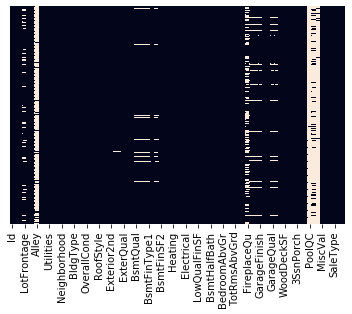

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

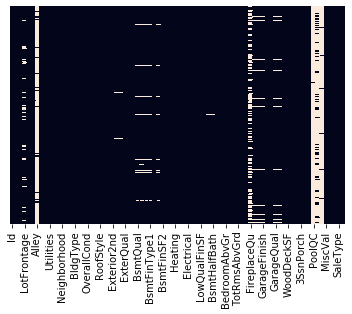

In [9]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [10]:
title_drop = ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature","Id"]
train.drop (title_drop , axis=1 , inplace = True)
test.drop (title_drop , axis=1 , inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [13]:
test["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [14]:
test["MSZoning"].fillna ("RL", inplace=True)

In [15]:
train["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [16]:
train['LotFrontage'].fillna((train['LotFrontage'].mean()), inplace=True)
test['LotFrontage'].fillna((test['LotFrontage'].mean()), inplace=True)

In [17]:
test["Utilities"].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [18]:
train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [19]:
test["Utilities"].fillna ("AllPub", inplace=True)

In [20]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [21]:
train["MasVnrType"].fillna ("None", inplace=True)

In [22]:
train["MasVnrArea"].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [23]:
train['MasVnrArea'].fillna((train['MasVnrArea'].mean()), inplace=True)

In [24]:
train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
train["BsmtQual"].fillna ("TA", inplace=True)

In [26]:
train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [27]:
train["BsmtCond"].fillna ("TA", inplace=True)

In [28]:
train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [29]:
train["BsmtExposure"].fillna ("No", inplace=True)

In [30]:
train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [31]:
train["BsmtFinType1"].fillna ("Unf", inplace=True)

In [32]:
train["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [33]:
train["BsmtFinType2"].fillna ("Unf", inplace=True)

In [34]:
train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
train["Electrical"].fillna ("SBrkr", inplace=True)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [37]:
train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [38]:
train["GarageType"].fillna ("Attchd", inplace=True)

In [39]:
train["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [40]:
train['GarageYrBlt'].fillna((train['GarageYrBlt'].mean()), inplace=True)

In [41]:
train["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [42]:
train["GarageFinish"].fillna ("Unf", inplace=True)

In [43]:
train["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [44]:
train["GarageQual"].fillna ("TA", inplace=True)

In [45]:
train["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [46]:
train["GarageCond"].fillna ("TA", inplace=True)

In [47]:
# Train Data cleaning done
# Test data cleaning start

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [49]:
test["Exterior1st"].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [50]:
test["Exterior1st"].fillna("VinylSd" , inplace=True)

In [51]:
test["Exterior2nd"].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [52]:
test["Exterior2nd"].fillna("VinylSd" , inplace=True)

In [53]:
test["MasVnrType"].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [54]:
test["MasVnrType"].fillna("None" , inplace=True)

In [55]:
test["MasVnrArea"].value_counts()

0.0      877
176.0     10
144.0      9
120.0      8
216.0      8
        ... 
634.0      1
177.0      1
615.0      1
549.0      1
442.0      1
Name: MasVnrArea, Length: 303, dtype: int64

In [56]:
test['MasVnrArea'].fillna(0, inplace=True)

In [57]:
test["BsmtQual"].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [58]:
test["BsmtQual"].fillna("TA" , inplace=True)

In [59]:
test["BsmtCond"].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [60]:
test["BsmtCond"].fillna("TA" , inplace=True)

In [61]:
test["BsmtExposure"].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [62]:
test["BsmtExposure"].fillna("No" , inplace=True)

In [63]:
test["BsmtFinType1"].value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [64]:
test["BsmtFinType1"].fillna("GLQ" , inplace=True)

In [65]:
test["BsmtFinSF1"].value_counts()

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
278.0       1
210.0       1
580.0       1
1328.0      1
771.0       1
Name: BsmtFinSF1, Length: 669, dtype: int64

In [66]:
test['BsmtFinSF1'].fillna(0, inplace=True)

In [67]:
test["BsmtFinType2"].value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [68]:
test["BsmtFinType2"].fillna("Unf" , inplace=True)

In [69]:
test["BsmtFullBath"].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [70]:
test["BsmtFinSF2"].value_counts()

0.0      1278
162.0       3
294.0       3
483.0       3
144.0       2
         ... 
308.0       1
167.0       1
186.0       1
250.0       1
750.0       1
Name: BsmtFinSF2, Length: 161, dtype: int64

In [71]:
test["BsmtFinSF2"].fillna(0 , inplace=True)

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [73]:
test["BsmtUnfSF"].value_counts()

0.0       123
384.0      11
624.0       8
480.0       7
100.0       7
         ... 
406.0       1
1604.0      1
1369.0      1
549.0       1
1211.0      1
Name: BsmtUnfSF, Length: 793, dtype: int64

In [74]:
test['BsmtUnfSF'].fillna(0, inplace=True)

In [75]:
test["TotalBsmtSF"].value_counts()

0.0       41
864.0     39
960.0     13
546.0     12
672.0     12
          ..
918.0      1
1910.0     1
1700.0     1
750.0      1
1075.0     1
Name: TotalBsmtSF, Length: 736, dtype: int64

In [76]:
test['TotalBsmtSF'].fillna((test['TotalBsmtSF'].mean()), inplace=True)

In [77]:
test["BsmtFullBath"].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [78]:
test["BsmtFullBath"].fillna(0 , inplace=True)

In [79]:
test["BsmtHalfBath"].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [80]:
test["BsmtHalfBath"].fillna(0 , inplace=True)

In [81]:
test["Functional"].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [82]:
test["Functional"].fillna("Typ" , inplace=True)

In [83]:
test["GarageType"].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64

In [84]:
test["GarageType"].fillna("Attchd" , inplace=True)

In [85]:
test["GarageYrBlt"].value_counts()

2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
          ..
1918.0     1
1895.0     1
1919.0     1
1896.0     1
1916.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [86]:
test["GarageYrBlt"].fillna(2005, inplace=True)

In [87]:
test["GarageFinish"].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [88]:
test["GarageFinish"].fillna("Unf", inplace=True)

In [89]:
test["GarageCars"].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [90]:
test["GarageCars"].fillna(2, inplace=True)

In [91]:
test["GarageArea"].value_counts()

0.0      76
576.0    50
440.0    47
484.0    34
400.0    33
         ..
364.0     1
369.0     1
316.0     1
226.0     1
353.0     1
Name: GarageArea, Length: 459, dtype: int64

In [92]:
test['GarageArea'].fillna((test['GarageArea'].mean()), inplace=True)

In [93]:
test["GarageQual"].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [94]:
test["GarageQual"].fillna("TA" , inplace=True)

In [95]:
test["KitchenQual"].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [96]:
test["KitchenQual"].fillna("TA" , inplace=True)

In [97]:
test["GarageCond"].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [98]:
test["GarageCond"].fillna("TA" , inplace=True)

In [99]:
test["SaleType"].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [100]:
test["SaleType"].fillna("WD" , inplace=True)

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [103]:
# Transformation of data

In [104]:
# Combining train and test data
train_test_data = [train, test]

In [105]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [106]:
test["MSZoning"].value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [107]:
train['MSZoning'].replace ( ["RL" , "RM" , "FV" , "RH" , "C (all)"] , ['1','2','3','3','3'] , inplace=True)
test['MSZoning'].replace ( ["RL" , "RM" , "FV" , "RH" , "C (all)"] , ['1','2','3','3','3'] , inplace=True)

In [108]:
train["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [109]:
test["Street"].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [110]:
train['Street'].replace ( ["Pave" , "Grvl"] , ['1','2'] , inplace=True)
test['Street'].replace ( ["Pave" , "Grvl"] , ['1','2'] , inplace=True)

In [111]:
train["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [112]:
train['LotShape'].replace ( ["Reg" , "IR1" , "IR2" , "IR3"] , ['1','2','3','3'] , inplace=True)
test['LotShape'].replace ( ["Reg" , "IR1" , "IR2" , "IR3"] , ['1','2','3','3'] , inplace=True)

In [113]:
train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [114]:
test["Utilities"].value_counts()

AllPub    1459
Name: Utilities, dtype: int64

In [115]:
train['Utilities'].replace ( ["AllPub" , "NoSeWa"] , ['1','2'] , inplace=True)
test['Utilities'].replace ( ["AllPub"] , ['1'] , inplace=True)

In [116]:
train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [117]:
train['LotConfig'].replace ( ["Inside" , "Corner" , "CulDSac" , "FR2" , "FR3"] , ['1','2',"3","4","4"] , inplace=True)
test['LotConfig'].replace ( ["Inside" , "Corner" , "CulDSac" , "FR2" , "FR3"] , ['1','2',"3","4","4"] , inplace=True)

In [118]:
train["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [119]:
train["LandSlope"].replace ( ["Gtl" , "Mod" , "Sev"] , ["1","2","2"] , inplace=True)
test["LandSlope"].replace ( ["Gtl" , "Mod" , "Sev"] , ["1","2","2"] , inplace=True)

In [120]:
train["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [121]:
test["Condition1"].value_counts()

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64

In [122]:
train["Condition2"].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [123]:
test["Condition2"].value_counts()

Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64

In [124]:
train["Condition1"].replace(["Norm","Feedr","Artery","RRAn","PosN","RRAe","PosA","RRNn","RRNe"] , 
                            ["1","2","3","3","3","3","3","3","3"] , inplace=True)
test["Condition1"].replace(["Norm","Feedr","Artery","RRAn","PosN","RRAe","PosA","RRNe","RRNn"] , 
                           ["1","2","3","3","3","3","3","3","3"] , inplace=True)

train["Condition2"].replace(["Norm","Feedr","PosN","Artery","RRNn","RRAn","RRAe","PosA"] , 
                            ["1","2","2","2","2","2","2","2"] , inplace=True)
test["Condition2"].replace(["Norm","Feedr","Artery","PosA","PosN"] , 
                           ["1","2","2","2","2"] , inplace=True)

In [125]:
train["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [126]:
train["BldgType"].replace(["1Fam" , "TwnhsE" , "Duplex" , "Twnhs" , "2fmCon"] , ["1","2","3","3","3"] , inplace=True)
test["BldgType"].replace(["1Fam" , "TwnhsE" , "Duplex" , "Twnhs" , "2fmCon"] , ["1","2","3","3","3"] , inplace=True)

In [127]:
train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [128]:
train["HouseStyle"].replace(["1Story" , "2Story" , "1.5Fin" , "SLvl" , "SFoyer" , "1.5Unf" , "2.5Unf" , "2.5Fin"] , 
                            ["1","2","3","4","4","4","4","4"] , inplace=True)
test["HouseStyle"].replace(["1Story" , "2Story" , "1.5Fin" , "SLvl" , "SFoyer" , "1.5Unf" , "2.5Unf" , "2.5Fin"] , 
                           ["1","2","3","4","4","4","4","4"] , inplace=True)

In [129]:
train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [130]:
train["RoofStyle"].replace(["Gable" , "Hip" , "Flat" , "Gambrel" , "Mansard" , "Shed"],["1","2","3","3","3","3"] , inplace=True)
test["RoofStyle"].replace(["Gable" , "Hip" , "Flat" , "Gambrel" , "Mansard" , "Shed"],["1","2","3","3","3","3"] , inplace=True)

In [131]:
train["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

In [132]:
train["RoofMatl"].replace(["CompShg" , "Tar&Grv" , "WdShngl" , "WdShake" , "Membran" , "Metal" , "ClyTile" , "Roll"]
                          ,["1","2","2","2","2","2","2","2"] , inplace=True)
test["RoofMatl"].replace(["CompShg" , "Tar&Grv" , "WdShngl" , "WdShake" , "Membran" , "Metal" , "ClyTile" , "Roll"]
                          ,["1","2","2","2","2","2","2","2"] , inplace=True)

In [133]:
train["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [134]:
test["Exterior1st"].value_counts()

VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [135]:
train['Exterior1st'].replace ( ["VinylSd" , "HdBoard" , "MetalSd" , "Wd Sdng" , "Plywood" , "CemntBd" , "BrkFace" , "WdShing" ,
                                "Stucco" , "AsbShng" , "BrkComm", "Stone" , "AsphShn" , "ImStucc" , "CBlock"] 
                               , ['1','2','3','4','5','6','6','6','6','6','6','6','6','6','6'] , inplace=True)

test['Exterior1st'].replace ( ["VinylSd" , "MetalSd" , "HdBoard" , "Wd Sdng" , "Plywood" , "CemntBd" , "BrkFace" , "WdShing" ,
                                "AsbShng" , "Stucco" , "BrkComm", "AsphShn" , "CBlock"] 
                               , ['1','2','3','4','5','6','6','6','6','6','6','6','6'] , inplace=True)

In [136]:
train["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [137]:
train['Exterior2nd'].replace ( ["VinylSd" , "MetalSd" , "HdBoard" , "Wd Sdng" , "Plywood" , "CmentBd" , "Wd Shng" , "Stucco" ,
                                "BrkFace" , "AsbShng" , "ImStucc" , "Brk Cmn" , "Stone" , "AsphShn" , "Other" , "CBlock"] 
                               , ['1','2','3','4','5','6','6','6','6','6','6','6','6','6','6','6'] , inplace=True)

test['Exterior2nd'].replace ( ["VinylSd" , "MetalSd" , "HdBoard" , "Wd Sdng" , "Plywood" , "CmentBd" , "Wd Shng" , "Stucco" ,
                                "BrkFace" , "AsbShng" , "ImStucc" , "Brk Cmn" , "Stone" , "AsphShn" , "Other" , "CBlock"] 
                               , ['1','2','3','4','5','6','6','6','6','6','6','6','6','6','6','6'] , inplace=True)

In [138]:
train["MasVnrType"].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [139]:
train['MasVnrType'].replace ( ["None" , "BrkFace" , "Stone" , "BrkCmn"] , ['1','2','3','3'] , inplace=True)
train['MasVnrType'].replace ( ["None" , "BrkFace" , "Stone" , "BrkCmn"] , ['1','2','3','3'] , inplace=True)

In [140]:
train["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [141]:
train['ExterQual'].replace ( ["TA" , "Gd" , "Ex" , "Fa"] , ['1','2','3','3'] , inplace=True)
test['ExterQual'].replace ( ["TA" , "Gd" , "Ex" , "Fa"] , ['1','2','3','3'] , inplace=True)

In [142]:
train["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [143]:
train['ExterCond'].replace ( ["TA" , "Gd" , "Ex" , "Fa" , "Po"] , ['1','2','3','3','3'] , inplace=True)
test['ExterCond'].replace ( ["TA" , "Gd" , "Ex" , "Fa" , "Po"] , ['1','2','3','3','3'] , inplace=True)

In [144]:
train["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [145]:
train['Foundation'].replace(["PConc" , "CBlock" , "BrkTil" , "Slab" , "Stone" , "Wood"],['1','2','3','4','4','4'], inplace=True)
test['Foundation'].replace(["PConc" , "CBlock" , "BrkTil" , "Slab" , "Stone" , "Wood"],['1','2','3','4','4','4'], inplace=True)

In [146]:
train["BsmtQual"].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [147]:
train['BsmtQual'].replace(["TA" , "Gd" , "Ex" , "Fa"],['1','2','3','3'], inplace=True)
test['BsmtQual'].replace(["TA" , "Gd" , "Ex" , "Fa"],['1','2','3','3'], inplace=True)

In [148]:
train["BsmtCond"].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [149]:
test["BsmtCond"].value_counts()

TA    1340
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [150]:
train['BsmtCond'].replace(["TA" , "Gd" , "Po" , "Fa"],['1','2','2','2'], inplace=True)
test['BsmtCond'].replace(["TA" , "Gd" , "Po" , "Fa"],['1','2','2','2'], inplace=True)

In [151]:
test["BsmtExposure"].value_counts()

No    995
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [152]:
train['BsmtExposure'].replace(["No" , "Av" , "Gd" , "Mn"],['1','2','3','4'], inplace=True)
test['BsmtExposure'].replace(["No" , "Av" , "Gd" , "Mn"],['1','2','3','4'], inplace=True)

In [153]:
train["BsmtFinType1"].value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [154]:
test["BsmtFinType1"].value_counts()

GLQ    473
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [155]:
train['BsmtFinType1'].replace ( ["Unf" , "GLQ" , "ALQ" , "BLQ" , "Rec" , "LwQ"] , ['1','2','3','4','5','6'] , inplace=True)
test['BsmtFinType1'].replace ( ["Unf" , "GLQ" , "ALQ" , "BLQ" , "Rec" , "LwQ"] , ['1','2','3','4','5','6'] , inplace=True)

In [156]:
train["BsmtFinType2"].value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [157]:
train['BsmtFinType2'].replace ( ["Unf" , "Rec" , "LwQ" , "BLQ" , "ALQ" , "GLQ"] , ['1','2','2','2','2','2'] , inplace=True)
test['BsmtFinType2'].replace ( ["Unf" , "Rec" , "LwQ" , "BLQ" , "ALQ" , "GLQ"] , ['1','2','2','2','2','2'] , inplace=True)

In [158]:
train["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [159]:
train['Heating'].replace ( ["GasA" , "GasW" , "Grav" , "Wall" , "OthW" , "Floor"] , ['1','2','2','2','2','2'] , inplace=True)
test['Heating'].replace ( ["GasA" , "GasW" , "Grav" , "Wall" , "OthW" , "Floor"] , ['1','2','2','2','2','2'] , inplace=True)

In [160]:
train["HeatingQC"].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [161]:
test["HeatingQC"].value_counts()

Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64

In [162]:
train['HeatingQC'].replace ( ["Ex" , "TA" , "Gd" , "Fa" , "Po"] , ['1','2','3','3','3'] , inplace=True)
test['HeatingQC'].replace ( ["Ex" , "TA" , "Gd" , "Fa" , "Po"] , ['1','2','3','3','3'] , inplace=True)

In [163]:
train["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [164]:
train['CentralAir'].replace ( ["Y" , "N"] , ['1','2'] , inplace=True)
test['CentralAir'].replace ( ["Y" , "N"] , ['1','2'] , inplace=True)

In [165]:
train["Electrical"].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [166]:
test["Electrical"].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [167]:
train['Electrical'].replace ( ["SBrkr" , "FuseA" , "FuseF" , "FuseP" , "Mix"] , ['1','2','2','2','2'] , inplace=True)
test['Electrical'].replace ( ["SBrkr" , "FuseA" , "FuseF" , "FuseP"] , ['1','2','2','2'] , inplace=True)

In [168]:
train["KitchenQual"].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [169]:
test["KitchenQual"].value_counts()

TA    758
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [170]:
train['KitchenQual'].replace ( ["TA" , "Gd" , "Ex" , "Fa"] , ['1','2','3','3'] , inplace=True)
test['KitchenQual'].replace ( ["TA" , "Gd" , "Ex" , "Fa"] , ['1','2','3','3'] , inplace=True)

In [171]:
train["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [172]:
test["Functional"].value_counts()

Typ     1359
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [173]:
train['Functional'].replace ( ["Typ" , "Min2" , "Min1" , "Mod" , "Maj1" , "Maj2" , "Sev"]
                               , ['1','2','2','2','2','2','2'] , inplace=True)
test['Functional'].replace ( ["Typ" , "Min2" , "Min1" , "Mod" , "Maj1" , "Maj2" , "Sev"]
                               , ['1','2','2','2','2','2','2'] , inplace=True)

In [174]:
train["GarageType"].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [175]:
train['GarageType'].replace ( ["Attchd" , "Detchd" , "BuiltIn" , "Basment" , "CarPort" , "2Types"]
                               , ['1','2','3','3','3','3'] , inplace=True)
test['GarageType'].replace ( ["Attchd" , "Detchd" , "BuiltIn" , "Basment" , "CarPort" , "2Types"]
                               , ['1','2','3','3','3','3'] , inplace=True)

In [176]:
train["GarageFinish"].value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [177]:
train['GarageFinish'].replace ( ["Unf" , "RFn" , "Fin"] , ['1','2','3'] , inplace=True)
test['GarageFinish'].replace ( ["Unf" , "RFn" , "Fin"] , ['1','2','3'] , inplace=True)

In [178]:
train["GarageQual"].value_counts()

TA    1392
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [179]:
train['GarageQual'].replace ( ["TA" , "Fa" , "Gd" , "Po" , "Ex"] , ['1','2','2','2','2'] , inplace=True)
test['GarageQual'].replace ( ["TA" , "Fa" , "Gd" , "Po" , "Ex"] , ['1','2','2','2','2'] , inplace=True)

In [180]:
train["GarageCond"].value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [181]:
train['GarageCond'].replace ( ["TA" , "Fa" , "Gd" , "Po" , "Ex"] , ['1','2','2','2','2'] , inplace=True)
test['GarageCond'].replace ( ["TA" , "Fa" , "Gd" , "Po" , "Ex"] , ['1','2','2','2','2'] , inplace=True)

In [182]:
train["PavedDrive"].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [183]:
test["PavedDrive"].value_counts()

Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64

In [184]:
train['PavedDrive'].replace ( ["Y" , "N" , "P"] , ['1','2','3'] , inplace=True)
test['PavedDrive'].replace ( ["Y" , "N" , "P"] , ['1','2','3'] , inplace=True)

In [185]:
train["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [186]:
test["SaleType"].value_counts()

WD       1259
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [187]:
train['SaleType'].replace ( ["WD" , "New" , "COD" , "ConLD" , "CWD" , "ConLI" , "Oth" , "ConLw" , "Con"] , 
                              ['1','2','3','3','3','3','3','3','3'] , inplace=True)
test['SaleType'].replace ( ["WD" , "New" , "COD" , "ConLD" , "CWD" , "ConLI" , "Oth" , "ConLw" , "Con"] , 
                              ['1','2','3','3','3','3','3','3','3'] , inplace=True)

In [188]:
test["SaleCondition"].value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [189]:
train['SaleCondition'].replace ( ["Normal" , "Partial" , "Abnorml" , "Family" , "Alloca" , "AdjLand"] , 
                              ['1','2','3','3','3','3'] , inplace=True)
test['SaleCondition'].replace ( ["Normal" , "Partial" , "Abnorml" , "Family" , "Alloca" , "AdjLand"] , 
                              ['1','2','3','3','3','3'] , inplace=True)

In [190]:
train["LandContour"].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [191]:
test["LandContour"].value_counts()

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

In [192]:
train['LandContour'].replace ( ["Lvl" , "Bnk" , "HLS" , "Low"] , ['1','2','2','2'] , inplace=True)
test['LandContour'].replace ( ["Lvl" , "Bnk" , "HLS" , "Low"] , ['1','2','2','2'] , inplace=True)

In [193]:
train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [194]:
test["Neighborhood"].value_counts()

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [195]:
train['Neighborhood'].replace ( ["NAmes" , "CollgCr" , "OldTown" , "Edwards" , "Somerst" , "Gilbert" , "NridgHt" , "Sawyer" , 
                                 "NWAmes" , "SawyerW" , "BrkSide" , "Crawfor" , "Mitchel" , "NoRidge" , "Timber" , "IDOTRR" , 
                                 "ClearCr" , "SWISU" , "StoneBr" , "MeadowV" , "Blmngtn" , "BrDale" , "Veenker" , "NPkVill" , 
                                 "Blueste"] , 
                                ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','17','17','17'
                                 ,'17','17','17','17','17'] , inplace=True)
test['Neighborhood'].replace ( ["NAmes" , "OldTown" , "CollgCr" , "Somerst" , "Edwards" , "NridgHt" , "Gilbert" , "Sawyer" , 
                                 "SawyerW" , "Mitchel" , "NWAmes" , "IDOTRR" , "Crawfor" , "BrkSide" , "Timber" , "NoRidge" , 
                                 "StoneBr" , "SWISU" , "MeadowV" , "ClearCr" , "BrDale" , "NPkVill" , "Veenker" , "Blmngtn" , 
                                 "Blueste"] , 
                                ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','17','17','17'
                                 ,'17','17','17','17','17'] , inplace=True)

In [196]:
test["MasVnrType"].value_counts()

None       894
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [197]:
test['MasVnrType'].replace ( ["None" , "BrkFace" , "Stone" , "BrkCmn"] , ['1','2','3','3'] , inplace=True)

In [199]:
# Data cleaning and conversion done
# Data type conversion to take place

In [200]:
# Train data conversion

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [202]:
train["MSZoning"] = train["MSZoning"].astype(float)
train["Street"] = train["Street"].astype(float)
train["LotShape"] = train["LotShape"].astype(float)
train["LandContour"] = train["LandContour"].astype(float)
train["Utilities"] = train["Utilities"].astype(float)
train["LotConfig"] = train["LotConfig"].astype(float)
train["LandSlope"] = train["LandSlope"].astype(float)
train["Neighborhood"] = train["Neighborhood"].astype(float)
train["Condition1"] = train["Condition1"].astype(float)
train["Condition2"] = train["Condition2"].astype(float)
train["BldgType"] = train["BldgType"].astype(float)
train["HouseStyle"] = train["HouseStyle"].astype(float)
train["RoofStyle"] = train["RoofStyle"].astype(float)
train["RoofMatl"] = train["RoofMatl"].astype(float)
train["Exterior1st"] = train["Exterior1st"].astype(float)
train["Exterior2nd"] = train["Exterior2nd"].astype(float)
train["MasVnrType"] = train["MasVnrType"].astype(float)
train["ExterQual"] = train["ExterQual"].astype(float)
train["ExterCond"] = train["ExterCond"].astype(float)
train["Foundation"] = train["Foundation"].astype(float)
train["BsmtQual"] = train["BsmtQual"].astype(float)
train["BsmtCond"] = train["BsmtCond"].astype(float)
train["BsmtExposure"] = train["BsmtExposure"].astype(float)
train["BsmtFinType1"] = train["BsmtFinType1"].astype(float)
train["BsmtFinType2"] = train["BsmtFinType2"].astype(float)
train["Heating"] = train["Heating"].astype(float)
train["HeatingQC"] = train["HeatingQC"].astype(float)
train["CentralAir"] = train["CentralAir"].astype(float)
train["Electrical"] = train["Electrical"].astype(float)
train["KitchenQual"] = train["KitchenQual"].astype(float)
train["Functional"] = train["Functional"].astype(float)
train["GarageType"] = train["GarageType"].astype(float)
train["GarageFinish"] = train["GarageFinish"].astype(float)
train["GarageQual"] = train["GarageQual"].astype(float)
train["GarageCond"] = train["GarageCond"].astype(float)
train["PavedDrive"] = train["PavedDrive"].astype(float)
train["SaleType"] = train["SaleType"].astype(float)
train["SaleCondition"] = train["SaleCondition"].astype(float)

In [203]:
# Test data conversion

In [204]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [205]:
test["MSZoning"] = test["MSZoning"].astype(float)
test["Street"] = test["Street"].astype(float)
test["LotShape"] = test["LotShape"].astype(float)
test["LandContour"] = test["LandContour"].astype(float)
test["Utilities"] = test["Utilities"].astype(float)
test["LotConfig"] = test["LotConfig"].astype(float)
test["LandSlope"] = test["LandSlope"].astype(float)
test["Neighborhood"] = test["Neighborhood"].astype(float)
test["Condition1"] = test["Condition1"].astype(float)
test["Condition2"] = test["Condition2"].astype(float)
test["BldgType"] = test["BldgType"].astype(float)
test["HouseStyle"] = test["HouseStyle"].astype(float)
test["RoofStyle"] = test["RoofStyle"].astype(float)
test["RoofMatl"] = test["RoofMatl"].astype(float)
test["Exterior1st"] = test["Exterior1st"].astype(float)
test["Exterior2nd"] = test["Exterior2nd"].astype(float)
test["MasVnrType"] = test["MasVnrType"].astype(float)
test["ExterQual"] = test["ExterQual"].astype(float)
test["ExterCond"] = test["ExterCond"].astype(float)
test["Foundation"] = test["Foundation"].astype(float)
test["BsmtQual"] = test["BsmtQual"].astype(float)
test["BsmtCond"] = test["BsmtCond"].astype(float)
test["BsmtExposure"] = test["BsmtExposure"].astype(float)
test["BsmtFinType1"] = test["BsmtFinType1"].astype(float)
test["BsmtFinType2"] = test["BsmtFinType2"].astype(float)
test["Heating"] = test["Heating"].astype(float)
test["HeatingQC"] = test["HeatingQC"].astype(float)
test["CentralAir"] = test["CentralAir"].astype(float)
test["Electrical"] = test["Electrical"].astype(float)
test["KitchenQual"] = test["KitchenQual"].astype(float)
test["Functional"] = test["Functional"].astype(float)
test["GarageType"] = test["GarageType"].astype(float)
test["GarageFinish"] = test["GarageFinish"].astype(float)
test["GarageQual"] = test["GarageQual"].astype(float)
test["GarageCond"] = test["GarageCond"].astype(float)
test["PavedDrive"] = test["PavedDrive"].astype(float)
test["SaleType"] = test["SaleType"].astype(float)
test["SaleCondition"] = test["SaleCondition"].astype(float)

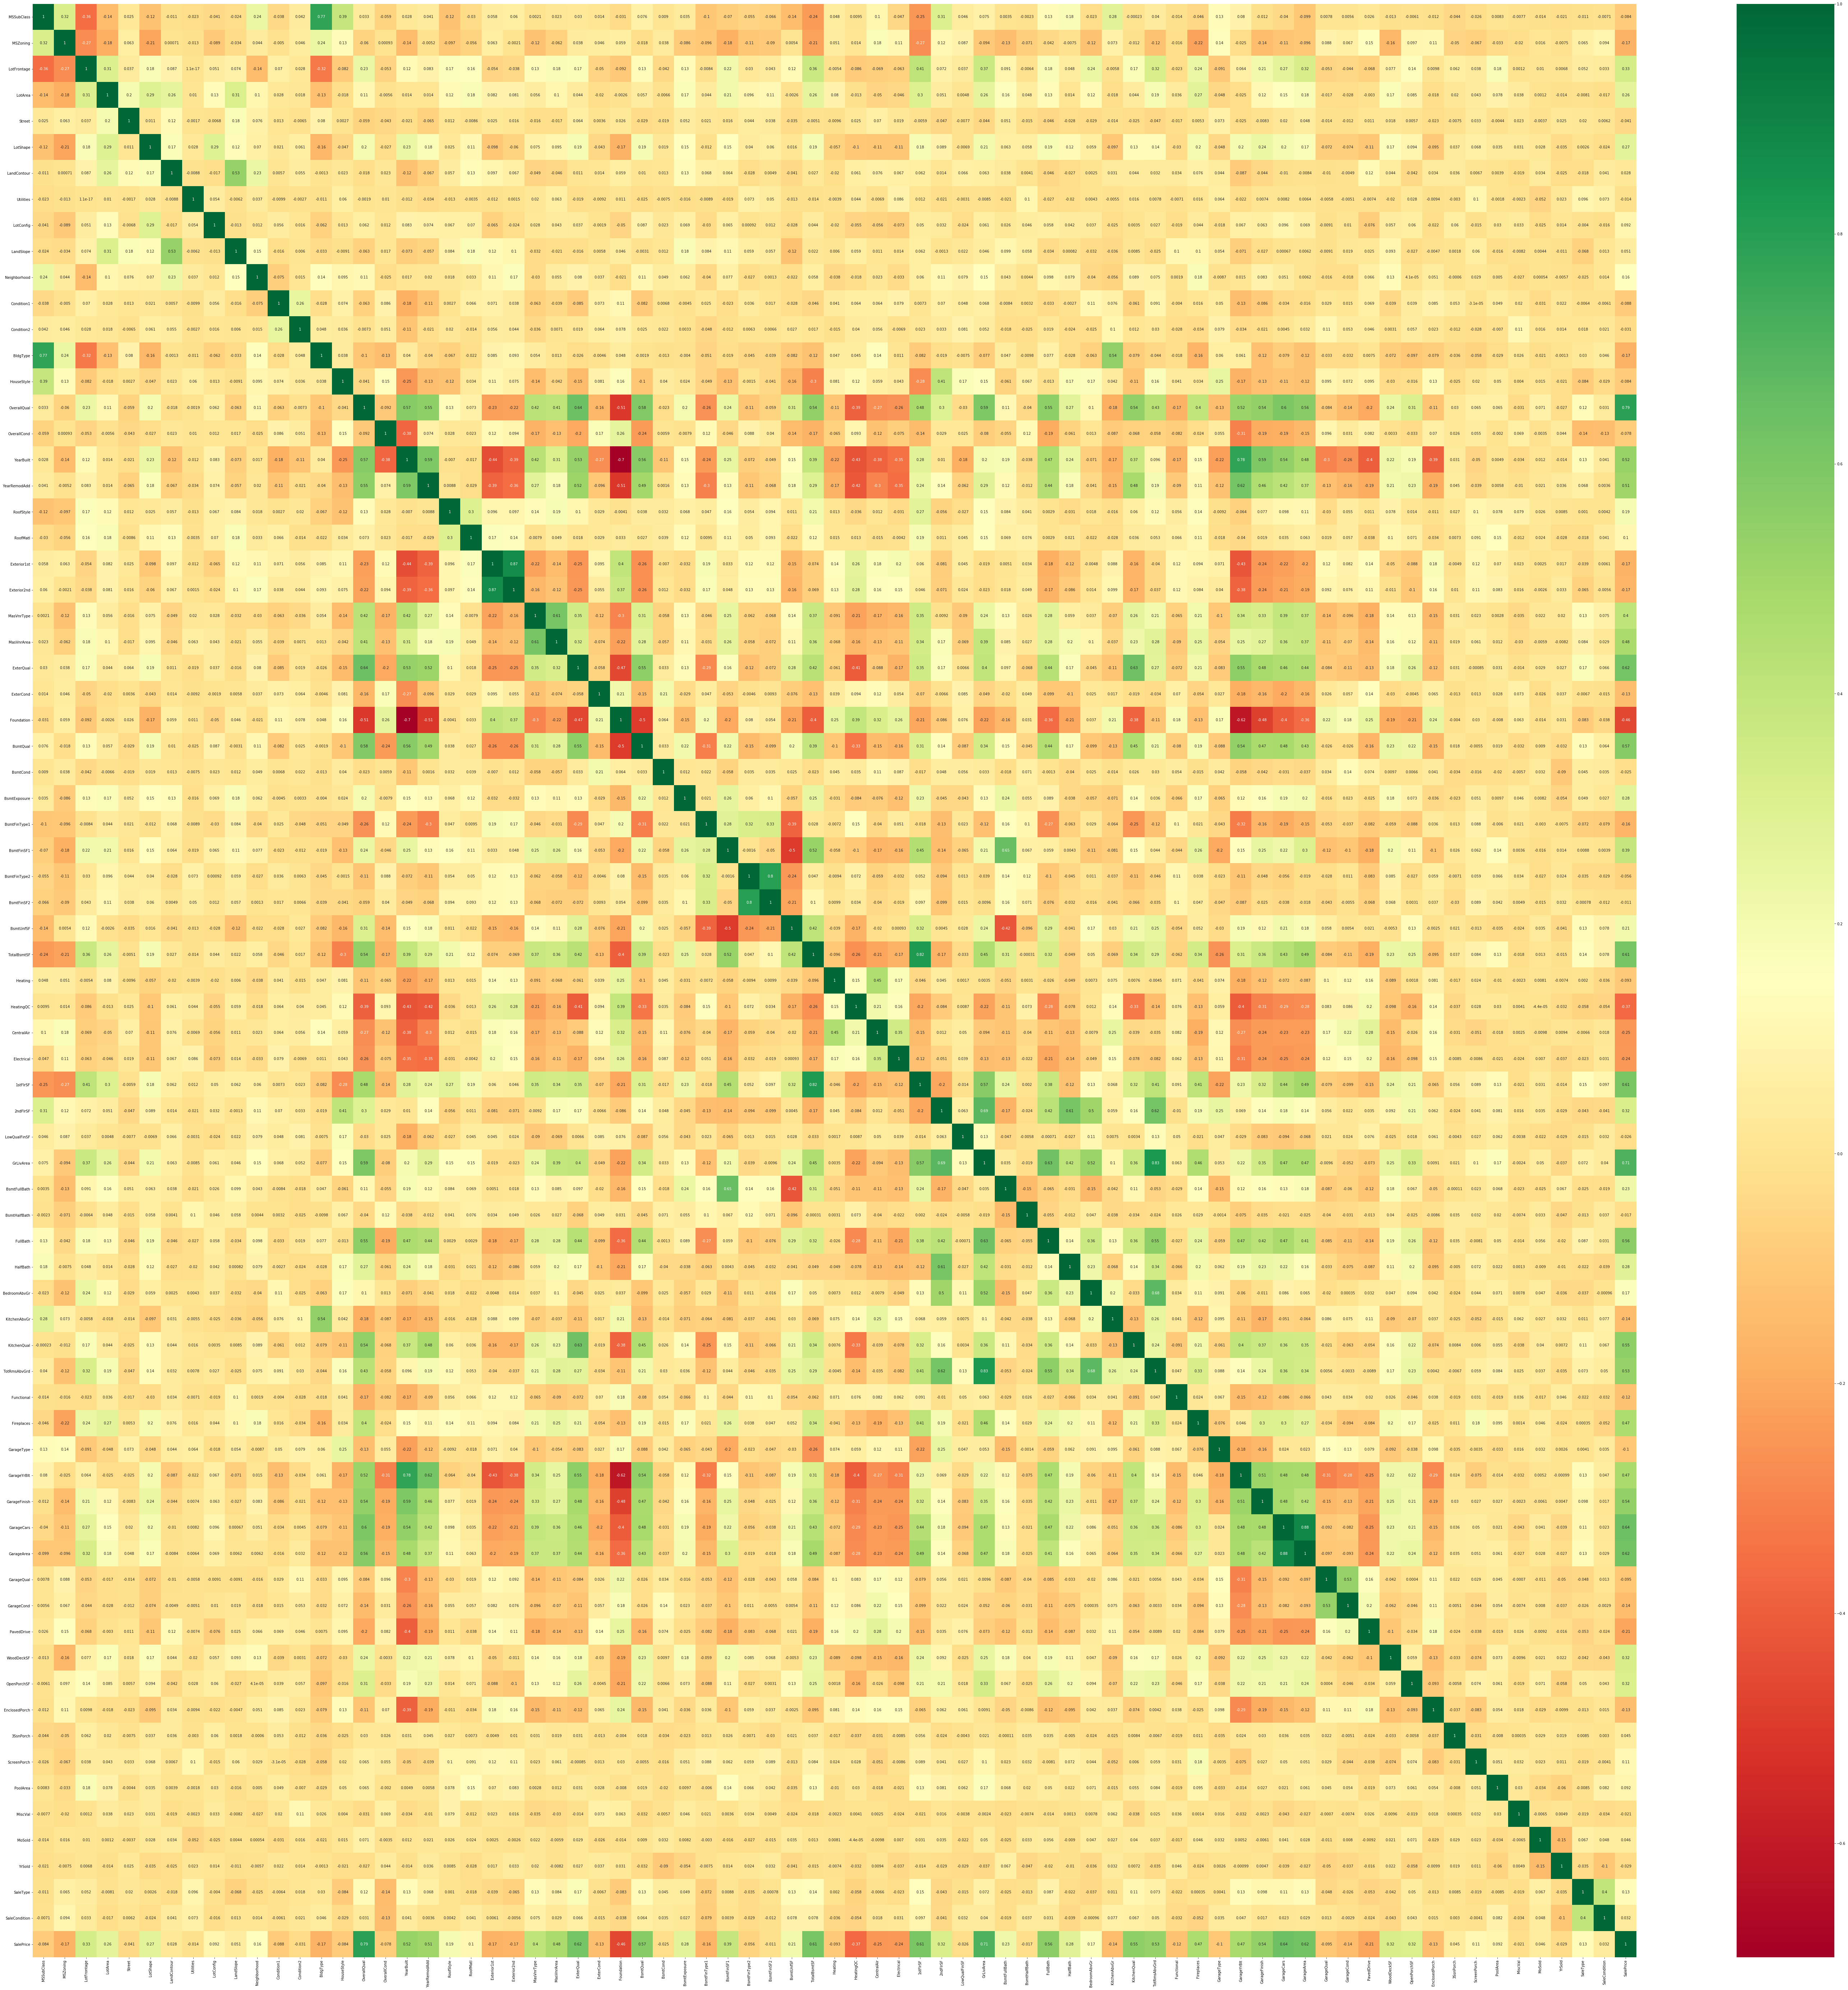

In [206]:
# Showing Correlation
#get correlations of each features in dataset

corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
fig = g.get_figure()
fig.savefig('hist.png')

In [207]:
train.drop (["LotFrontage"] , axis=1 , inplace=True)
test.drop (["LotFrontage"] , axis=1 , inplace=True)

In [209]:
# Saving clean train data
train.to_csv (r"C:\Users\admin\Desktop\Datasets\House Prices Advanced Regression Techniques Kaggle\train_clean.csv", index = False, header=True)

# Saving clean test data
test.to_csv (r"C:\Users\admin\Desktop\Datasets\House Prices Advanced Regression Techniques Kaggle\test_clean.csv", index = False, header=True)